Dodatno definiram funkcijo, ki mi poračuna matriko na potenco.

In [43]:
library(mlbench)
library(stats)

"%^%" <- function(M, power)
  with(eigen(M), vectors %*% (values^power * solve(vectors)))

Algoritem je podoben kot pri unnormalized, razlika je samo ta, da namesto nenormalizirane Laplaceove matrike vzamem random walk Laplaceovo matriko.

In [44]:
#set.seed(10)
#objekt <- mlbench.spirals(100,1,0.025)
#podatki <- objekt$x
#plot(podatki)

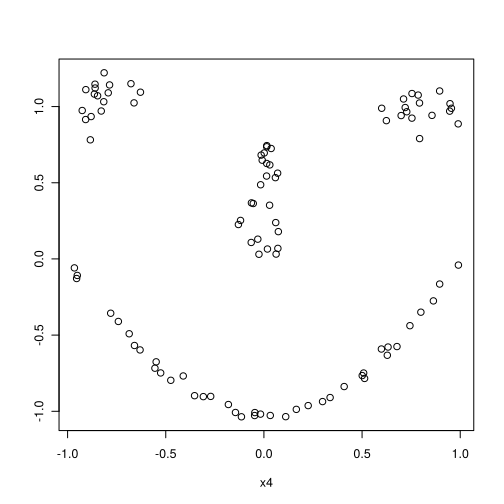

In [77]:
set.seed(5)
objekt <- mlbench.smiley(n=100, sd1 = 0.1, sd2 = 0.025)
podatki <-  objekt$x
plot(podatki)

In [78]:
s <- function(x1, x2, alpha=1) {
    exp(- alpha * norm(as.matrix(x1-x2), type="F"))
}

In [79]:
podobnostna.matrika <- function(podatki, razdalja, r = 2) {
  N <- nrow(podatki)
  S <- matrix(rep(NA,N^2), ncol=N)
  for(i in 1:N) {
    for(j in 1:N) {
        if (norm(as.matrix(podatki[i,]-podatki[j,]), type="F") >= r) {
            S[i,j] <- 0
        } else {
            S[i,j] <- razdalja(podatki[i,], podatki[j,])
       }
    }
  }
  S
}

In [80]:
podobnostna.matrika.epsilon <- function(podatki, epsilon = 0.5) {
  N <- nrow(podatki)
  S <- matrix(rep(NA,N^2), ncol=N)
  for(i in 1:N) {
    for(j in 1:N) {
        if (norm(as.matrix(podatki[i,]-podatki[j,]), type="F") > epsilon ) {
            S[i,j] <- 0
        } else {
            S[i,j] <- 1
       }
    }
  }
  S
}

In [81]:
S <- podobnostna.matrika(podatki, s)
#S[1:8,1:8]
S.epsilon <- podobnostna.matrika.epsilon(podatki)

In [82]:
affinity.matrika <- function(S, st.sosedov=length(S[,1])) {
  N <- length(S[,1])

  if (st.sosedov >= N) { #poln graf
    A <- S
  } else {
    A <- matrix(rep(0,N^2), ncol=N) #prazna matrika
    for(i in 1:N) {
      najboljsa.ujemanja <- sort(S[i,], decreasing=TRUE)[1:st.sosedov] #povezem tiste, kateri so blizji
      for (s in najboljsa.ujemanja) {
        j <- which(S[i,] == s)
        A[i,j] <- S[i,j]
        A[j,i] <- S[i,j] #simetricna matrika - neusmerjen graf
      }
    }
  }
  A  
}


In [92]:
A <- affinity.matrika(S, 4)
#A[1:8,1:8]

In [93]:
D <- diag(apply(A, 1, sum))
#D[1:8,1:8]
D.epsilon <- diag(apply(S.epsilon, 1, sum))

Poracunam normalizirano Laplaceovo matriko (random walk = $D^{-1}*U$ ).

In [94]:
U <- D - A
U.epsilon <- D.epsilon - S.epsilon

In [95]:
Lrw <- (D %^% (-1)) %*% U
#round(Lrw[1:10,1:10],1)
Lrw.epsilon <- (D %^% (-1)) %*% U.epsilon

In [1]:
k <- 4 #spremeni glede na to, koloko grup isces

In [97]:
lastne_vrednosti <- eigen(Lrw)
Z   <- lastne_vrednosti$vectors[,(ncol(lastne_vrednosti$vectors)-k+1):ncol(lastne_vrednosti$vectors)]
lastne_vrednosti.epsilon <- eigen(Lrw.epsilon)
Z.epsilon   <- lastne_vrednosti.epsilon$vectors[,(ncol(lastne_vrednosti.epsilon$vectors)-k+1):ncol(lastne_vrednosti.epsilon$vectors)]

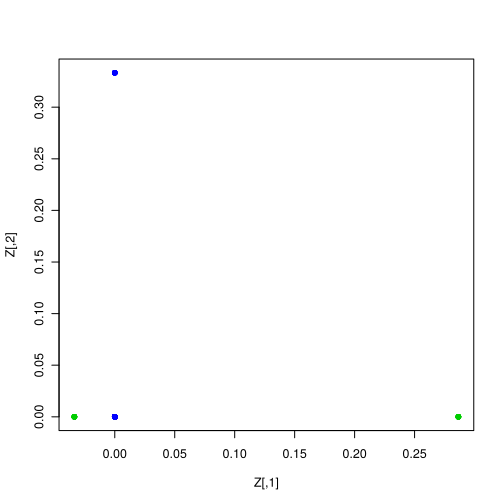

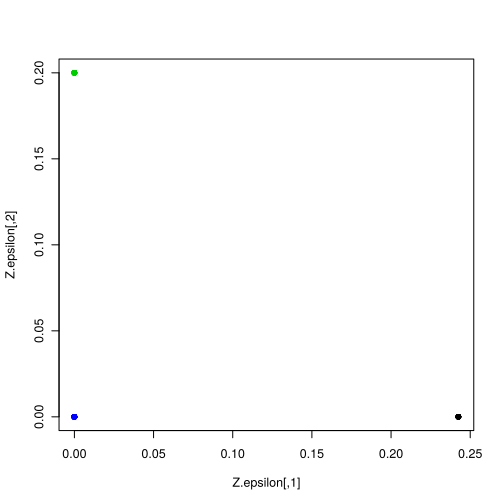

In [98]:
plot(Z, col=objekt$classes, pch=20)
plot(Z.epsilon, col=objekt$classes, pch=20)

Uporabim k-means algoritem.

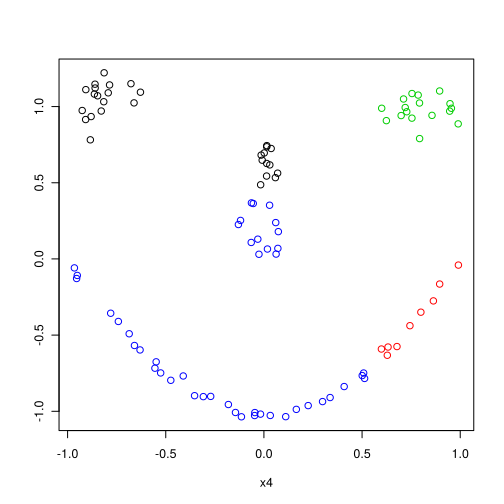

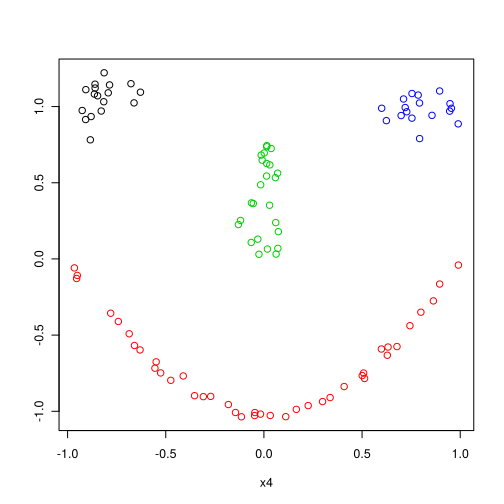

In [99]:
km <- kmeans(Z, centers=k)
plot(podatki, col=km$cluster)
km.epsilon <- kmeans(Z.epsilon, centers=k)
plot(podatki, col=km.epsilon$cluster)

In [91]:
lastne_vrednosti$values[(lastne_vrednosti$values) <= 0] <- 1e-16

#signif(lastne_vrednosti$values,2) #absolutne lastne vrednosti, saj pridejo nekatere negativne

lastne_vrednosti.epsilon$values[(lastne_vrednosti.epsilon$values) <= 0] <- 1e-16

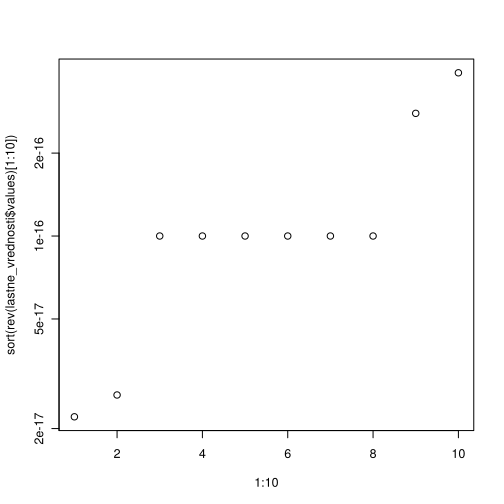

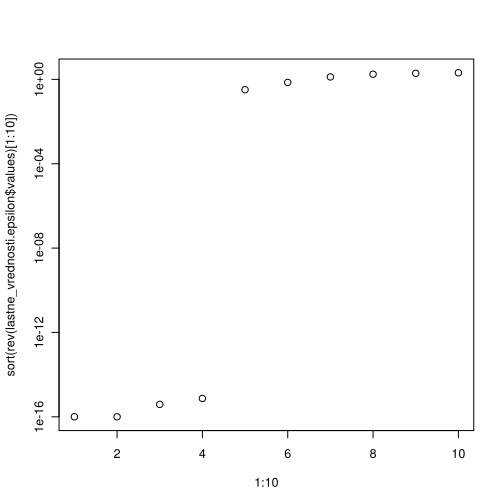

In [76]:
plot(1:10, sort(rev(lastne_vrednosti$values)[1:10]), log = "y")

plot(1:10, sort(rev(lastne_vrednosti.epsilon$values)[1:10]), log = "y")